Importing the dependencies

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Reading the CSV File and Plotting the points

Enter the path of the csv file:/content/sample_data/Train.csv
      x          y
0    24  21.549452
1    50  47.464463
2    15  17.218656
3    38  36.586398
4    87  87.288984
..   ..        ...
694  58  58.595006
695  93  94.625094
696  82  88.603770
697  66  63.648685
698  97  94.975266

[699 rows x 2 columns]


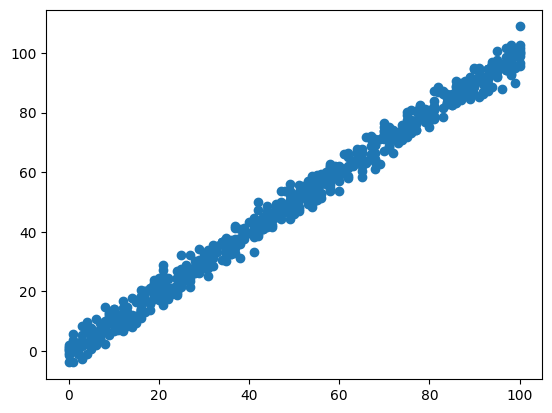

In [ ]:
input_csv_path=input("Enter the path of the csv file:")
csv_file=pd.read_csv(input_csv_path)
print(csv_file)
csv_file.shape
plt.scatter(csv_file.iloc[:,0:1],csv_file.iloc[:,1:])    #Either slicing using .iloc or csv_file['col_name']
plt.show()

Doing it from scratch

Training Data

In [ ]:
# x_data=csv_file['x']
# x_data.shape
data=np.arange(9)
data2=np.arange(9)
print(data*data2)
# data*=10
# print(data)

[ 0  1  4  9 16 25 36 49 64]


Enter the number of iterations:100000
Loss Function Values: [2705.5272204752473, 305.4522576488098, 40.698318397611864, 11.493126788644643, 8.271481402155205, 7.916099076122104, 7.876896222370395, 7.872571346208765, 7.872093884057834, 7.872040832861362, 7.872034598770842, 7.8720335291461545]
Bias Values: [0.01, 0.018985687711058644, 0.021965731653654327, 0.022951118107011923, 0.02327401811053988, 0.023376886351106893, 0.02340667554283984, 0.023412193170045947, 0.023409649688840125, 0.023404429086756755, 0.02339831955047275, 0.023391914991383985]
Weights: [0.1, 0.7002129283486285, 0.8995620380217191, 0.9657720310715959, 0.9877624574001436, 0.9950662151454213, 0.9974920817179693, 0.9982978516572794, 0.9985655380234232, 0.9986545103984826, 0.9986841263958655, 0.9986940283241829]


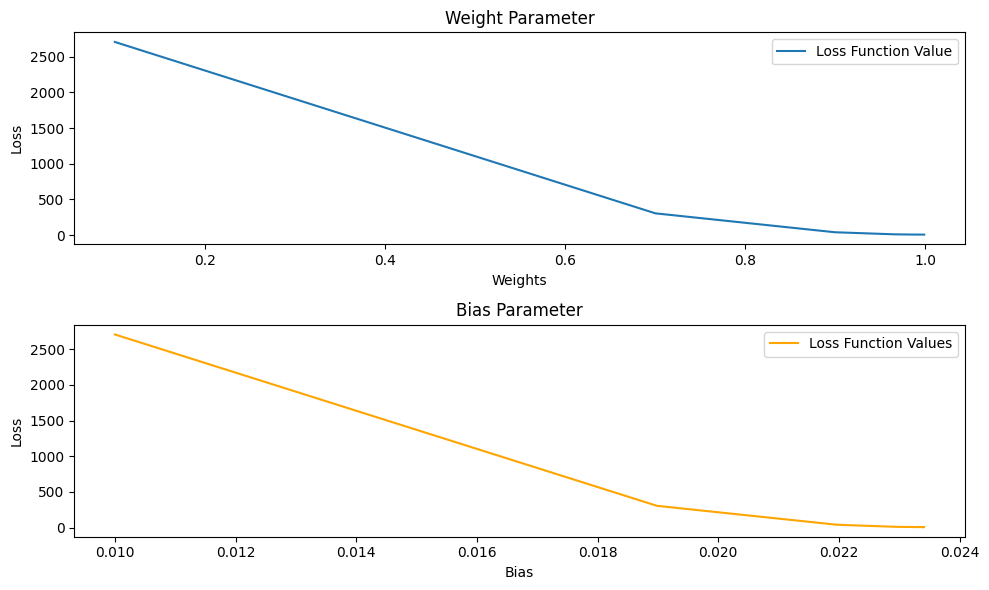

The Final Loss Function Value on Test Data is :  9.459256761211432


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data (replace with your actual file path)
csv_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Train_single_variable_linear_regression.csv')
x_data = np.array(csv_file['x'])
y_data = np.array(csv_file['y'])

iterations = int(input("Enter the number of iterations:"))
weight = 0.1
bias = 0.01
learning_rate = 0.0001  # Adjusted learning rate
previous_loss_function = None
threshold = 1e-6

loss_function_values = []
bias_values = []
weights = []

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

while iterations != 0:
    # Predict using current weights and bias
    y_pred = (x_data * weight) + bias

    # Check how far from the true value using the loss function
    error = loss_function(y_data, y_pred)

    # If the difference between loss function now and the last loss function is low, then exit
    if previous_loss_function is not None:
        if abs(previous_loss_function - error) <= threshold:
            break

    previous_loss_function = error
    loss_function_values.append(error)
    bias_values.append(bias)
    weights.append(weight)

    # Calculating the gradients
    weight_derivative = (2/x_data.shape[0]) * sum(x_data * (y_pred-y_data))
    bias_derivative = (2/x_data.shape[0]) * sum(y_pred-y_data)

    # Updating weights and bias
    weight = weight - (learning_rate * weight_derivative)
    bias = bias - (learning_rate * bias_derivative)

    iterations -= 1

print("Loss Function Values:", loss_function_values)
print("Bias Values:", bias_values)
print("Weights:", weights)

# Plotting results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(weights,loss_function_values, label='Loss Function Value')
plt.xlabel('Weights')
plt.ylabel('Loss')
plt.title('Weight Parameter')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bias_values,loss_function_values, label='Loss Function Values', color='orange')
plt.xlabel('Bias')
plt.ylabel('Loss')
plt.title('Bias Parameter')
plt.legend()

plt.tight_layout()
plt.show()


#############################################  TESTING   #####################################
csv_file_2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Test_single_variable_linear_regression.csv')
x_test_data=csv_file_2['x']
y_test_data=csv_file_2['y']

y_pred_data=(weight*x_test_data)+bias
print("The Final Loss Function Value on Test Data is : ",loss_function(y_test_data,y_pred_data))

Now checking the accuracy of the parameters

In [ ]:
test_csv=pd.read_csv(input("Enter the path of the csv file:"))
x_test=test_csv['x']
y_test=test_csv['y']

y_pred=x_test*weight+bias

error=np.mean((y_pred-y_test)**2)
print(error)

Enter the path of the csv file:/content/sample_data/Test.csv
9.459256761211432


Now trying for **multivariable linear regression**
**Personal Implementation**

Defining a loss function

In [ ]:
def loss_function(z_true,z_pred):
  return np.mean((z_true-z_pred)**2)  #This is the objective function to minimise

In [ ]:
csv_file_path=input("Enter the path of the csv file:")
csv_file=pd.read_csv(csv_file_path)
csv_file.shape

Enter the path of the csv file:/content/sample_data/multiple_linear_regression_dataset.csv


(20, 3)

In [ ]:
csv_file_path=input("Enter the path of the csv file:")
csv_file=pd.read_csv(csv_file_path)

x = pd.to_numeric(csv_file.iloc[:, 0], errors='coerce')
y = pd.to_numeric(csv_file.iloc[:, 1], errors='coerce')
z = pd.to_numeric(csv_file.iloc[:, 2], errors='coerce')

#Initialising the weights and biases
weight1,weight2,bias=418,926,0.01
learning_rate=0.0001
epochs=int(input("Enter the number of epochs:"))


#Keeping a records of all the values for making the graph
weights1=[]
weights2=[]
biases=[]
loss_function_values=[]

#Threshold to stop running when we are close enough to loss function 0
threshold=1e-6

previous_error=None
#Now quickly running through all the epochs and changing the weights and biases(parameters)
for i in range(epochs):
  z_pred=(x*weight1)+(y*weight2)+bias
  current_error=loss_function(z,z_pred)

  if (previous_error is not None):
    if (abs(previous_error-current_error)<=threshold):
      break

  previous_error=current_error
  weights1.append(weight1)
  weights2.append(weight2)
  biases.append(bias)
  loss_function_values.append(current_error)

  weight_1_gradient = (-2 * sum((z-z_pred)*x)) / x.shape[0]
  weight_2_gradient = (-2 * sum((z-z_pred) * y)) / y.shape[0]
  bias_gradient = (-2 * sum(z-z_pred)) / x.shape[0]

  weight1=weight1-learning_rate*weight_1_gradient
  weight2=weight2-learning_rate*weight_2_gradient
  bias=bias-learning_rate*bias_gradient




# print("Weights1",weights1)
# print("Weights2",weights2)
# print("Biases",biases)
print("Loss_function_values",loss_function_values)

plt.subplot(3,1,1)
plt.plot(weights1,loss_function_values)
plt.title("Gradient with Weight-1")

plt.subplot(3,1,2)
plt.plot(weights2,loss_function_values)
plt.title("Variation with Weight-2")

plt.subplot(3,1,3)
plt.plot(biases,loss_function_values)
plt.title("Variation with Bias")

plt.show()

print("The Final Parameters of Weights and Biases are:")
print("Weight-1:",weight1)
print("Weight-2:",weight2)
print("Bias:",bias)

**Boston Dataset for multivariable linear regression**

x_train.shape: (379, 12)
x_test.shape: (127, 12)
y_train.shape: (379, 1)
y_test.shape: (127, 1)
The number of training points in one epoch is  379
Enter the batch size for updating the weights and bias:17
Enter the number of epochs:800
-----------EPOCH- 1 ---------------
-----------EPOCH- 2 ---------------
-----------EPOCH- 3 ---------------
-----------EPOCH- 4 ---------------
-----------EPOCH- 5 ---------------
-----------EPOCH- 6 ---------------
-----------EPOCH- 7 ---------------
-----------EPOCH- 8 ---------------
-----------EPOCH- 9 ---------------
-----------EPOCH- 10 ---------------
-----------EPOCH- 11 ---------------
-----------EPOCH- 12 ---------------
-----------EPOCH- 13 ---------------
-----------EPOCH- 14 ---------------
-----------EPOCH- 15 ---------------
-----------EPOCH- 16 ---------------
-----------EPOCH- 17 ---------------
-----------EPOCH- 18 ---------------
-----------EPOCH- 19 ---------------
-----------EPOCH- 20 ---------------
-----------EPOCH- 21 ------------

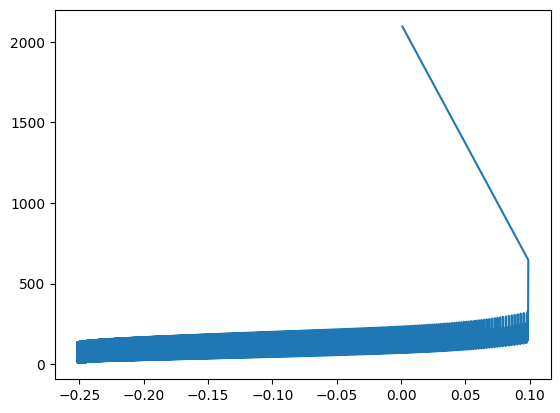

The Final Loss Function Value on Testing is : 62.68848654753149


In [ ]:
#Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Input the file and creating training and testing data
csv_file=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Boston.csv')

x_data=csv_file.iloc[:,1:-1]
y_data=csv_file.iloc[:,-1:]

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

print("x_train.shape:",x_train.shape)
print("x_test.shape:",x_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

#initialise all the col_name and weights and biases and learning rate and matrix to store all the values for graph plot
x_col_names=x_train.columns
weights=np.ones([1,x_col_names.shape[0]])*0.1
bias=0.005
learning_rate=0.000001
loss_function_values=[] #To store the values of the loss function at all times

#input the batch size and epochs
print("The number of training points in one epoch is ",x_train.shape[0])
batch_size=int(input("Enter the batch size for updating the weights and bias:"))
epochs=int(input("Enter the number of epochs:"))
# threshold=0.000005
weight1=[0.001]

#make a function for the losses or costs
def loss_function(y_pred,y_true):
  return np.mean((y_true-y_pred)**2)


################################################  TRAINING    ################################################
#run the epochs
for i in range(epochs):
  curr=1
  print("-----------EPOCH-",i+1,"---------------")
  while[True]:
    toggle=False  #This is for breaking when the batches are over

    #creating the batch data for prediction
    if ((x_train.shape[0]-curr)<=batch_size):
      x_batch=x_train.iloc[curr-1:,:]
      y_batch=y_train.iloc[curr-1:,:]
      toggle=True
    else:
      x_batch=x_train.iloc[curr-1:curr+batch_size-1,:]
      y_batch=y_train.iloc[curr-1:curr+batch_size-1,:]
      curr=curr+batch_size
    #Data for prediction created

    #Predicted data for a batch
    y_pred=(np.dot(x_batch,weights.T))+bias
    loss_function_values.append(loss_function(y_pred,y_batch))

    # Calculate gradients for weights and bias
    residuals = y_batch-y_pred
    weight_gradients = -2 * np.mean(residuals.values * x_batch.values, axis=0)
    bias_gradient = -2 * np.mean(residuals)

    # Update weights and bias
    weights = weights - (learning_rate * weight_gradients.reshape(1, -1))
    bias = bias - (learning_rate * bias_gradient)
    weight1.append(weights[0,0])

    #Breaking when the batches are over
    if (toggle):
      break

    #Debugging

    # print("X-Batch")
    # print(x_batch)
    # print("Y-Batch")
    # print(y_batch)
    # print("Y-Pred:")
    # print(y_pred)
    # Print weight gradients and updated weights for debugging
    # print("Weight Gradients:", weight_gradients)
    # print("Updated Weights:", weights)
    # print("Bias Gradient:", bias_gradient)
    # print("Updated Bias:", bias)

print(loss_function_values)
print("Final Weights:")
print(weights)
print("Final Bias:")
print(bias)
plt.plot(weight1[:-1],loss_function_values)
plt.show()

##################################################  TESTING ################################################
#finally test using test values
y_pred=np.dot(x_test,weights.T)
print("The Final Loss Function Value on Testing is :",loss_function(y_pred,y_test))
#use sklearn.metrics to check the accuracy of the boston dataset

Now trying this Boston Dataset with **Normal Equation**

In [ ]:
# Import the dependencies
import pandas as pdlgh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Input the file and create training and testing data
csv_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Boston.csv')

x_data = csv_file.iloc[:, 1:-1]
y_data = csv_file.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                   test_size=0.25,
                                   shuffle=True)

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

# Adding intercept term to features (bias term)
x_train = np.c_[np.ones(x_train.shape[0]), x_train]
x_test = np.c_[np.ones(x_test.shape[0]), x_test]

############################################  TRAINING  #################################

# # Normal Equation
def normal_equation(X, y):
    # Calculate weights using normal equation
    theta = (np.linalg.inv(X.T @ X)) @ X.T @ y
    return theta

def loss_function(y,y_pred):
  return np.mean((y-y_pred)**2)

# # Training using normal equation
theta = normal_equation(x_train, y_train)

theta=theta.values
# # Extract weights and bias
bias = theta[0]
weights = theta[1:]

print("Final Bias:", bias)
print("Final Weights:",weights)


############################################  TESTING  #################################
y_pred=np.dot(x_test,theta)+bias
print(loss_function(y_test,y_pred))


x_train.shape: (379, 12)
x_test.shape: (127, 12)
y_train.shape: (379, 1)
y_test.shape: (127, 1)
Final Bias: [43.46025653]
Final Weights: [[-1.38290293e-01]
 [ 4.10207364e-02]
 [ 4.35509015e-02]
 [ 1.92461697e+00]
 [-1.90666232e+01]
 [ 3.69234051e+00]
 [ 1.32240375e-02]
 [-1.37463520e+00]
 [ 3.07430548e-01]
 [-1.31396686e-02]
 [-1.10030490e+00]
 [-5.60335015e-01]]
1916.3243838999763
